# Capstone Project

A description of the problem and a discussion of the background.
A description of the data and how it will be used to solve the problem.
For the second week, the final deliverables of the project will be:

A link to your Notebook on your Github repository, showing your code. (15 marks)
A full report consisting of all of the following components (15 marks):
Introduction where you discuss the business problem and who would be interested in this project.
Data where you describe the data that will be used to solve the problem and the source of the data.
Methodology section which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, and what machine learnings were used and why.
Results section where you discuss the results.
Discussion section where you discuss any observations you noted and any recommendations you can make based on the results.
Conclusion section where you conclude the report.
3. Your choice of a presentation or blogpost

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import requests

# Get data

## Use pandas to get tables of data from wikipedia for Germany

In [3]:
#Get data for Germany GDP
url_gdp = 'https://de.wikipedia.org/wiki/Liste_der_deutschen_Städte_nach_Bruttoinlandsprodukt'
html = requests.get(url_gdp)
html=html.text
df_gdp = pd.read_html(html)
df_gdp=df_gdp[0]
df_gdp.head()

,0,1,2,3,4,5
0,Rang,Stadt,Bundesland,Bruttoinlandsproduktin Mio. €,Bruttoinlandsproduktpro Kopf in €,Bruttoinlandsproduktpro Arbeitnehmer in €
1,1,Berlin,Berlin Berlin,130.537,36.798,68.906
2,2,Hamburg,Hamburg Hamburg,112.959,62.793,92.163
3,3,München,Bayern Bayern,109.571,75.186,100.776
4,4,Frankfurt am Main,Hessen Hessen,66.917,91.099,97.178


## Get quantity of people per big cities from Wikipedia

In [4]:
url_einwohner= 'https://de.wikipedia.org/wiki/Liste_der_Großstädte_in_Deutschland'
#Get html
html = requests.get(url_einwohner)
html=html.text

#Read html into a dataframe
df_einwohner = pd.read_html(html)
df_einwohner = pd.DataFrame(df_einwohner[0])
df_einwohner.reset_index()
#print(type(df_einwohner))
#df_einwohner=df_einwohner.iloc[2:11].drop

#clean and prepare data
df_einwohner.drop(df_einwohner.columns[2:11],axis=1,inplace=True)
df_einwohner.drop(df_einwohner.columns[0:2],axis=0,inplace=True)
df_einwohner.columns=['Rang','City','Einwohner 2017','km2','ew/kw2','Bevölkerungsentwicklung','Grossstadt erstmals','Bundesland']
df_einwohner['City'] = df_einwohner['City'].str.replace('1','')
#df_einwohner.columns=['Rang 2017','Name']
#df_gdp=df_gdp[0]
df_einwohner.head()

,Rang,City,Einwohner 2017,km2,ew/kw2,Bevölkerungsentwicklung,Grossstadt erstmals,Bundesland
2,1,Berlin,3.613.495,89168.0,4.009,108.0,1747.0,Berlin Berlin
3,2,Hamburg,1.830.584,75522.0,2.397,111.0,1787.0,Hamburg Hamburg
4,3,München,1.456.039,31070.0,4.713,-56.0,1852.0,Bayern Bayern
5,4,Köln,1.080.394,40502.0,2.656,41.0,1852.0,Nordrhein-Westfalen Nordrhein-Westfalen
6,5,Frankfurt am Main,746.878,24831.0,2.966,142.0,1875.0,Hessen Hessen


In [5]:
#get the shapes
print('GDP',df_gdp.shape)
print('Einwohner',df_einwohner.shape)

GDP (111, 6)
Einwohner (82, 8)


## Get Well Being Data from Github

In [6]:
#get data from OECD from file on project github, the assign dtype as it read them wrongly.

#df_oecd = pd.read_excel('https://github.com/dacog/Coursera_Capstone/raw/master/OECD%20Regional%20Well-being%20November%202018.xlsx',dtype={'Education': float,'Jobs': float,'Income': float, 'Safety': float, 'Health': float, 'Environment': float, 'Civic engagement': float, 'Accessiblity to services': float, 'Housing': float, 'Community': float, 'Life satisfaction': float })
df_oecd = pd.read_excel('https://github.com/dacog/Coursera_Capstone/raw/master/OECD%20Regional%20Well-being%20November%202018.xlsx')

#prepare data, replace str with 0.0
df_oecd[['Education', 'Jobs', 'Income', 'Safety',
       'Health', 'Environment', 'Civic engagement', 'Accessiblity to services',
       'Housing', 'Community', 'Life satisfaction']] = df_oecd[['Education', 'Jobs', 'Income', 'Safety',
       'Health', 'Environment', 'Civic engagement', 'Accessiblity to services',
       'Housing', 'Community', 'Life satisfaction']].replace({'..':0.0})
df_oecd.reset_index()
df_oecd.head()






,Country,Region,Code,Education,Jobs,Income,Safety,Health,Environment,Civic engagement,Accessiblity to services,Housing,Community,Life satisfaction
0,Australia,New South Wales,AU1,8.1,8.4,6.9,9.5,8.5,9.2,10.0,7.9,7.8,8.9,7.8
1,Australia,Victoria,AU2,8.2,8.3,5.8,9.3,8.9,9.6,10.0,8.1,9.4,9.3,8.5
2,Australia,Queensland,AU3,7.6,7.9,5.8,9.5,8.3,9.3,10.0,8.1,7.8,8.6,8.1
3,Australia,South Australia,AU4,7.3,7.6,5.7,9.1,8.4,9.8,10.0,7.4,7.8,8.6,8.5
4,Australia,Western Australia,AU5,7.7,8.5,6.7,9.0,8.9,8.2,10.0,8.4,9.4,8.5,7.8


In [7]:
#df_oecd.info

#check columns
df_oecd.columns

Index(['Country', 'Region', 'Code', 'Education', 'Jobs', 'Income', 'Safety',
       'Health', 'Environment', 'Civic engagement', 'Accessiblity to services',
       'Housing', 'Community', 'Life satisfaction'],
      dtype='object')

In [8]:
#check types
df_oecd.dtypes

Country                      object
Region                       object
Code                         object
Education                   float64
Jobs                        float64
Income                      float64
Safety                      float64
Health                      float64
Environment                 float64
Civic engagement            float64
Accessiblity to services    float64
Housing                     float64
Community                   float64
Life satisfaction           float64
dtype: object

In [9]:
#df_oecd.describe()

In [10]:
#get shape
df_oecd.shape

(402, 14)

# Get Geodata using Nominatim

## Import libraries

In [11]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line to install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

#import requests # library to handle requests
#from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda/envs/DSX-Python35:
#
geopy                     1.18.1                     py_0    conda-forge
Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda/envs/DSX-Python35:
#
folium                    0.5.0                      py_0    conda-forge
Libraries imported.


## Test addresses to chek if Nominatim is working

In [12]:
#try addresses
address = 'Wisconsin'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of address are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of address are 44.4308975, -89.6884637.


In [13]:
#set 'Region' as index
df_oecd.set_index('Region', inplace=True)

In [14]:
#some stuff to make it more interactive
import sys
import time
output_stream = sys.stdout

#improve the data a bit

try:
    df_oecd.drop(df_oecd.index[df_oecd.index.get_loc('Other Regions')], inplace=True) #drop other regions of Iceland as they can't be geolocalized
    print('Other Regions in Iceland deleted')
except: print('Other Regions in Iceland already deleted')

try:
    df_oecd.drop(df_oecd.index[df_oecd.index.get_loc('Western Black Sea - Middle and East')], inplace=True) #drop Western Black Sea - Middle and East of Trkey as they can't be geolocalized
    print('Western Black Sea - Middle and East in Iceland deleted')
except: print('Western Black Sea - Middle and East in Turkey already deleted')

try:
    df_oecd.rename(index={'Northern-Kanto, Koshin':'Northern-Kanto'}, inplace=True) #Koshin in the index name makes Nominatim crash
    print('Koshin deleted from name')
except: print('Koshin already deleted from name')

try:
    df_oecd.rename(index={'Western Black Sea - West':'West Black Sea Region'}, inplace=True) #Western Black Sea - West renamed in the index name makes Nominatim crash
    print('Western Black Sea - West renamed to West Black Sea Region')
except: print('Western Black Sea - West already renamed')


try:
    df_oecd.rename(index={'Tasman-Nelson-Marl.':'Tasman Nelson'}, inplace=True) #Tasman-Nelson-Marl. renamed to Tasman Nelson in the index to get coordinates
    print('Tasman-Nelson-Marl. renamed to Tasman Nelson')
except: print('Tasman-Nelson-Marl. already renamed')

try:
    df_oecd.rename(index={'Mediterranean region - Middle':'Mediterranean Region, Turkey'}, inplace=True) #Tasman-Nelson-Marl. renamed to Mediterranean Region, Turkey in the index to get coordinates
    print('Mediterranean region - Middle renamed to Mediterranean Region, Turkey')
except: print('Mediterranean region - Middle already renamed')

try:
    df_oecd.rename(index={'South-Eastern Norway':'Eastern Norway'}, inplace=True) #South-Eastern Norway renamed to Eastern Norway in the index to get coordinates. According to https://en.wikipedia.org/wiki/Eastern_Norway is the same
    print('South-Eastern Norway renamed to Eastern Norway')
except: print('South-Eastern Norway already renamed')

try:
    df_oecd.rename(index={'Småland with Islands':'Småland'}, inplace=True) #Småland with Islandsrenamed to Småland in the index to get coordinates. According to https://en.wikipedia.org/wiki/Eastern_Norway is the same
    print('Småland with Islands renamed to Småland')
except: print('Småland with Islands already renamed')

try: 
    df_oecd.drop(df_oecd.index[df_oecd.index.get_loc('Pieriga')], inplace=True) #Pieriga doesn't get coordinates
    print('Pieriga row deleted')
except: print('Pieriga row already deleted')

#initialize nominatim
geolocator = Nominatim(user_agent="ny_explorer")
#add new columns
df_oecd['Latitude']=''
df_oecd['Longitude']=''
i=0
i_except=0
delete_list=[]
print('I have to get', df_oecd.shape[0], 'coordinates')

#for iteration to get coordinates, 0 if fails
for i in range(i,df_oecd.shape[0]):
        try:
            location = geolocator.geocode(df_oecd.index[i], timeout=1) #added timeout to get the whole list without errors
            df_oecd.iloc[i, df_oecd.columns.get_loc('Latitude')] = location.latitude
            df_oecd.iloc[i, df_oecd.columns.get_loc('Longitude')] = location.longitude
#            print( i,df_oecd.index[i], 'has lat', location.latitude, 'and long', location.longitude)
        except:
            df_oecd.iloc[i, df_oecd.columns.get_loc('Latitude')] = 0
            df_oecd.iloc[i, df_oecd.columns.get_loc('Longitude')] = 0
            #df_oecd.drop(df_oecd.index[i], axis=0, inplace=True) #Fix this. When I delete the row, df.shape changes, thus I created a List below
            print(i,df_oecd.index[i],'added to delete list')
            i_except= i_except+1
            delete_list.append(i)
        output_stream.write('%s\r' % i)
        output_stream.flush()
print('I added',i, 'coordinates using Nominatim')
print('I was not able to get',i_except, 'coordinates so I added them to delete_list')
print('coordinates ready')



Other Regions in Iceland deleted
Western Black Sea - Middle and East in Iceland deleted
Koshin deleted from name
Western Black Sea - West renamed to West Black Sea Region
Tasman-Nelson-Marl. renamed to Tasman Nelson
Mediterranean region - Middle renamed to Mediterranean Region, Turkey
South-Eastern Norway renamed to Eastern Norway
Småland with Islands renamed to Småland
Pieriga row deleted
I have to get 399 coordinates
329 Northeastern Anatolia - West added to delete list
330 Northeastern Anatolia - East added to delete list
334 Southeastern Anatolia - Middle added to delete list
I added 398 coordinates using Nominatim
I was not able to get 3 coordinates so I added them to delete_list
coordinates ready


In [15]:
df_oecd.drop(df_oecd.index[delete_list], axis=0, inplace=True)
print('All items with coordinates 0,0 deleted')


All items with coordinates 0,0 deleted


In [16]:
#df_oecd.head()
df_oecd.index.tolist

<bound method IndexOpsMixin.tolist of Index(['New South Wales', 'Victoria', 'Queensland', 'South Australia',
       'Western Australia', 'Tasmania', 'Northern Territory',
       'Canberra Capital Region', 'Burgenland', 'Lower Austria',
       ...
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='Region', length=396)>

In [17]:
#check if there are any rows without coordinates
df_oecd.loc[df_oecd['Latitude'] == 0]

,Country,Code,Education,Jobs,Income,Safety,Health,Environment,Civic engagement,Accessiblity to services,Housing,Community,Life satisfaction,Latitude,Longitude
Region,,,,,,,,,,,,,,,


In [18]:
'''import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig, ax = plt.subplots(figsize=(20,12))
sns.distplot(df_oecd['Health'], bins=20, kde=False, rug=True)'''

"import matplotlib.pyplot as plt\nimport seaborn as sns\n%matplotlib inline\nfig, ax = plt.subplots(figsize=(20,12))\nsns.distplot(df_oecd['Health'], bins=20, kde=False, rug=True)"

In [19]:
#sns.jointplot(x='Region', y='Health',data=df_oecd)

# Get Foursquare data

To get the data I developed a package with a function to get the venues around a coordinate. I used the foursquare package and then transformed the output into a dataframe.

In [20]:
# Install and import packages and libraries

!pip install foursquare
!pip install git+https://github.com/dacog/foursquare_api_tools.git#egg=foursquare_api_tools --upgrade --force-reinstall
#!pip install git+https://github.com/dacog/foursquare_api_tools.git#egg=foursquare_api_tools

import foursquare as fs
from foursquare_api_tools import foursquare_api_tools as ft

Requirement not upgraded as not directly required: foursquare in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages
Requirement not upgraded as not directly required: requests>=2.1 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from foursquare)
Requirement not upgraded as not directly required: six in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from foursquare)
Requirement not upgraded as not directly required: chardet<3.1.0,>=3.0.2 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from requests>=2.1->foursquare)
Requirement not upgraded as not directly required: idna<2.7,>=2.5 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from requests>=2.1->foursquare)
Requirement not upgraded as not directly required: urllib3<1.23,>=1.21.1 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from requests>=2.1->foursquare)
Requirement not upgraded as not directly required: certifi>=2017.4.17 in /opt/conda/envs/DSX-Python35/lib/pytho

## Add client ID and Secrete from Foursquare

In [21]:
# The code was removed by Watson Studio for sharing.

In [22]:
# Construct the client object as instructed in foursquare package
client = fs.Foursquare(client_id=CLIENT_ID, client_secret=CLIENT_SECRET, version=VERSION)

In [23]:
#test the function imported to get venues as dataframe
ft.venues_explore(client,lat='40.7233',lng='-74.0030',limit=10)

,index,Address,Category,City,Country,Latitude,Longitude,Name
0,0,459 Broome St,Arts & Crafts Store,New York,United States,40.722326,-74.000994,Purl Soho
1,0,42 Wooster St,Salon / Barbershop,New York,United States,40.722371,-74.002562,Sam Brocato Salon
2,0,466 Broome St,Dance Studio,New York,United States,40.722578,-74.001363,Dance With Me SoHo
3,0,484 Broome St,Dessert Shop,New York,United States,40.723101,-74.002477,MarieBelle
4,0,171 Spring St,Tapas Restaurant,New York,United States,40.724800,-74.002220,Boqueria
5,0,90 Thompson St,Italian Restaurant,New York,United States,40.725223,-74.002594,San Carlo Osteria Piemonte
6,0,101 Greene St,Electronics Store,New York,United States,40.724510,-74.000056,Sonos
7,0,161 Ave of the Americas,Gym,New York,United States,40.725883,-74.003787,Physique 57
8,0,119 Sullivan St,Sushi Restaurant,New York,United States,40.726161,-74.002633,Blue Ribbon Sushi
9,0,233 Spring Street,Grocery Store,New York,United States,40.725611,-74.004985,Trader Joe's


## Prepare dataset for foursquare query

**we have a usage limit for foursquare, so just use the countries we are interested in**

In [24]:
df_fs=df_oecd.loc[df_oecd['Country']=='Chile']
df_fs=df_fs.append(df_oecd.loc[df_oecd['Country']=='Germany'])
df_fs #df_fs as in dataframe_foursquare

,Country,Code,Education,Jobs,Income,Safety,Health,Environment,Civic engagement,Accessiblity to services,Housing,Community,Life satisfaction,Latitude,Longitude
Region,,,,,,,,,,,,,,,
Tarapacá,Chile,CL01,5.9,7.1,0.9,0.0,5.3,5.8,0.0,3.2,1.1,4.1,5.6,-20.1637,-69.5463
Antofagasta,Chile,CL02,6.5,5.7,1.3,0.0,3.7,6.5,0.0,5.9,1.1,6.3,7.0,-23.6464,-70.398
Atacama,Chile,CL03,5.2,5.0,0.8,0.0,5.4,8.3,0.3,3.3,1.7,6.6,1.9,-24.5563,-69.4226
Coquimbo,Chile,CL04,4.8,6.0,0.5,1.9,6.7,8.3,0.6,1.9,1.7,7.4,6.3,-29.9532,-71.338
Valparaíso,Chile,CL05,5.9,5.9,0.8,0.0,5.2,5.3,1.1,3.1,2.2,6.3,7.4,-33.0458,-71.6197
O'Higgins,Chile,CL06,3.9,6.7,0.6,2.2,5.3,3.5,1.3,1.7,1.7,3.8,4.8,-48.4484,-72.5733
Maule,Chile,CL07,2.7,6.9,0.5,0.0,4.5,6.8,1.3,0.3,1.7,1.1,5.6,43.2233,-0.888587
Bío-Bío,Chile,CL08,4.7,5.7,0.6,0.5,5.0,6.9,1.1,2.0,1.7,4.1,4.8,-37.3391,-72.4107
Araucanía,Chile,CL09,3.9,6.3,0.5,0.0,4.5,8.4,0.5,0.4,1.7,4.5,4.8,-38.6672,-72.2587


## Look for venues for each region in the new dataset

In [25]:
i=0
venues_ft = pd.DataFrame()

for i in range(i,df_fs.shape[0]):
    lat = df_fs.iloc[i,df_fs.columns.get_loc('Latitude')]
    long = df_fs.iloc[i,df_fs.columns.get_loc('Longitude')]
    print(lat,long)
    try:
        new_venues=ft.venues_explore(client,lat=str(lat),lng=str(long),limit=500, offset=10)
        venues_ft=venues_ft.append(new_venues)
        print('shape',venues_ft.shape)
    except:
        print(i,'has no data')
    output_stream.write('%s\r' % i)
    output_stream.flush()
venues_ft.head()

-20.1636672 -69.5463448
0 has no data
-23.6463741 -70.3980033
shape (705, 8)
-24.5563029 -69.4226479
2 has no data
-29.9531928 -71.3379884
shape (1200, 8)
-33.0458456 -71.6196749
shape (2200, 8)
-48.4484482 -72.5733313
5 has no data
43.2233373 -0.8885873
6 has no data
-37.3391407 -72.4106825
7 has no data
-38.6671583 -72.2587321
8 has no data
-42.300844 -73.105387
9 has no data
-46.1434629 -74.3648869416981
10 has no data
-53.1608636 -70.8991017
shape (2965, 8)
-33.4377968 -70.6504451


Invalid response: <html>
<head><title>502 Bad Gateway</title></head>
<body bgcolor="white">
<center><h1>502 Bad Gateway</h1></center>
<hr><center>nginx</center>
</body>
</html>



shape (3965, 8)
-1.4941273 -79.5542485
13 has no data
-18.5918514 -69.7586083
14 has no data
48.6296972 9.1949534
15 has no data
48.9467562 11.4038717
16 has no data
52.5170365 13.3888599
shape (4965, 8)
52.8455492 13.2461296
18 has no data
53.0758196 8.8071646
shape (5965, 8)
53.550341 10.000654
shape (6965, 8)
50.6118537 9.1909725
21 has no data
53.7735234 12.5755746
22 has no data
52.8398531 9.075962
23 has no data
51.4785568 7.5533645
shape (7240, 8)
49.7497346 7.4396553
25 has no data
49.4173988 6.9805789
26 has no data
50.9295798 13.4585052
27 has no data
51.908526 11.4939134
28 has no data
54.1853998 9.8220089
29 has no data
50.7333163 11.0747905
30 has no data


,index,Address,Category,City,Country,Latitude,Longitude,Name
0,0,Washington 2623,Library,Antofagasta,Chile,-23.645973,-70.398601,Biblioteca Regional Antofagasta
1,0,Uribe 305 Local 3,Sushi Restaurant,Antofagasta,Chile,-23.647520,-70.400398,Sushi Enkai
2,0,,Café,,Chile,-23.645888,-70.398830,Letra y Música Café Literario
3,0,Sucre 433,Theater,Antofagasta,Chile,-23.646459,-70.396494,Teatro Municipal de Antofagasta
4,0,Manuel Antonio Matta 2617,Paper / Office Supplies Store,Antofagasta,Chile,-23.649454,-70.395639,HOLA Timbres Store


In [26]:
venues_ft.shape

(7240, 8)

In [77]:
df_oecd.index[394]

'Wisconsin'

In [27]:
venues_ft.head()

,index,Address,Category,City,Country,Latitude,Longitude,Name
0,0,Washington 2623,Library,Antofagasta,Chile,-23.645973,-70.398601,Biblioteca Regional Antofagasta
1,0,Uribe 305 Local 3,Sushi Restaurant,Antofagasta,Chile,-23.647520,-70.400398,Sushi Enkai
2,0,,Café,,Chile,-23.645888,-70.398830,Letra y Música Café Literario
3,0,Sucre 433,Theater,Antofagasta,Chile,-23.646459,-70.396494,Teatro Municipal de Antofagasta
4,0,Manuel Antonio Matta 2617,Paper / Office Supplies Store,Antofagasta,Chile,-23.649454,-70.395639,HOLA Timbres Store


In [63]:
#test for valparaiso
valpo=ft.venues_explore(client,lat=str(latitude),lng=str(longitude),limit=200)
valpo.shape

KeyError: 'postalCode'

## Exploring the regions with OECD data

## KMeans Clusters

In [169]:
# K Clusters

from sklearn.cluster import KMeans 
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

#df_k = df_oecd.drop(['Country','Code'],axis=1)
#df_k_names = df_oecd['Region']
#df_k_values = df_k.drop(['Region'],axis=1)
featureset=df_oecd[['Education', 'Jobs', 'Income', 'Safety',
       'Health', 'Environment', 'Civic engagement', 'Accessiblity to services',
       'Housing', 'Community', 'Life satisfaction']]

x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]
#X = preprocessing.StandardScaler().fit(x).transform(x)
#X[0:5]


array([[ 0.81,  0.84,  0.69,  0.95,  0.85,  0.92,  1.  ,  0.79,  0.78,
         0.89,  0.78],
       [ 0.82,  0.83,  0.58,  0.93,  0.89,  0.96,  1.  ,  0.81,  0.94,
         0.93,  0.85],
       [ 0.76,  0.79,  0.58,  0.95,  0.83,  0.93,  1.  ,  0.81,  0.78,
         0.86,  0.81],
       [ 0.73,  0.76,  0.57,  0.91,  0.84,  0.98,  1.  ,  0.74,  0.78,
         0.86,  0.85],
       [ 0.77,  0.85,  0.67,  0.9 ,  0.89,  0.82,  1.  ,  0.84,  0.94,
         0.85,  0.78]])

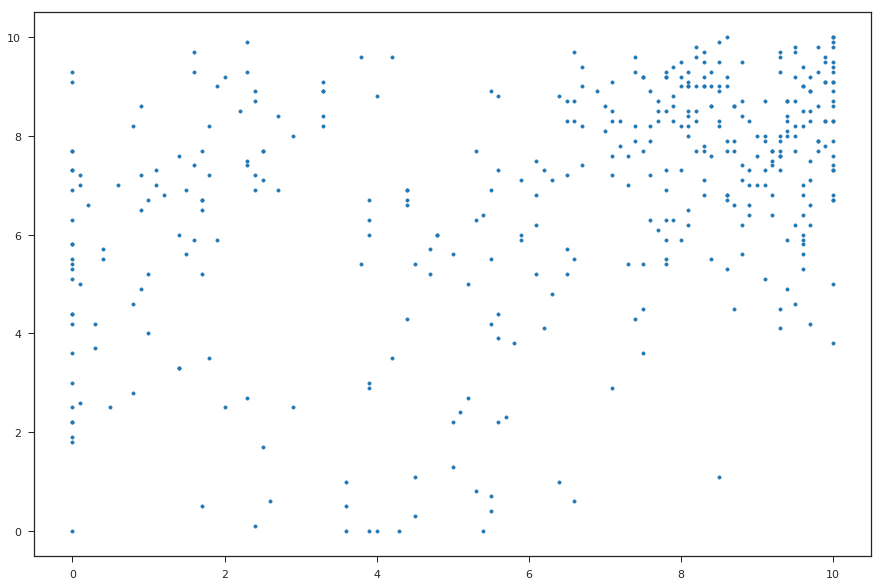

In [170]:
from matplotlib import pyplot as plt 
plt.figure(figsize=(15, 10))
plt.scatter(x[:, 0], x[:, 1], marker='.')

In [171]:
#define KMeans
k=14
k_means = KMeans(init="k-means++", n_clusters=k, n_init=12)
k_means.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=14, n_init=12, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [172]:
#x.head()

k_means_labels = k_means.labels_
k_means_labels

array([12, 12, 13, 13, 12, 11, 12, 12, 13, 13, 10, 13, 13, 13, 13, 13, 13,
        1, 13,  1, 13, 13, 13, 13, 13, 13, 13, 12, 13, 13,  2,  2,  2,  4,
        4,  4,  4,  4,  4,  5,  4,  4,  4,  5,  4,  4,  4,  4, 13,  6,  6,
        6,  6,  6,  6,  6, 13, 13, 13, 13, 13,  6,  6,  6,  0,  6, 13, 13,
       13, 13,  7, 10,  1,  1,  1,  1,  1, 13, 13,  1,  1, 13,  1,  1, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  6,  6,  6,  6,  6,  6,
        6, 13,  1, 13, 10, 10,  4, 10, 10, 10, 10, 10, 10, 10,  1,  3,  3,
        3,  1,  3,  3,  1, 10,  1, 10, 10, 10, 10, 10, 10,  1,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7, 10, 10, 10, 10, 10, 10, 10,  2,  2,  2,
        2,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 13,  5,  5,  4,  5,
        5,  5,  5,  4,  4,  5,  5,  5,  5,  5,  5,  5,  4,  4,  4,  5,  5,
        5,  4,  5,  5,  5,  4,  5,  5,  5,  4,  4, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13

In [173]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[  9.60000000e+00,   5.58181818e+00,  -4.44089210e-16,
          3.16363636e+00,   2.36363636e-01,   5.01818182e+00,
          1.24545455e+00,   5.07272727e+00,   0.00000000e+00,
          3.45454545e-01,   3.63636364e-02],
       [  5.44705882e+00,   4.30882353e+00,   3.70588235e+00,
          9.35588235e+00,   8.76764706e+00,   6.24705882e+00,
          6.16764706e+00,   7.16176471e+00,   5.68235294e+00,
          8.34117647e+00,   5.51470588e+00],
       [  1.11111111e-01,   5.67777778e+00,   2.40000000e+00,
          4.92222222e+00,   1.60000000e+00,   7.68888889e+00,
          3.46666667e+00,   4.56666667e+00,   2.15555556e+00,
          4.66666667e-01,   4.44444444e-02],
       [  5.02500000e+00,   8.65000000e-01,   2.03000000e+00,
          8.74000000e+00,   7.83000000e+00,   3.33500000e+00,
          3.86000000e+00,   5.09500000e+00,   3.50500000e+00,
          4.72500000e+00,   1.88500000e+00],
       [  3.87083333e+00,   6.65833333e+00,   6.12500000e-01,
          7.25

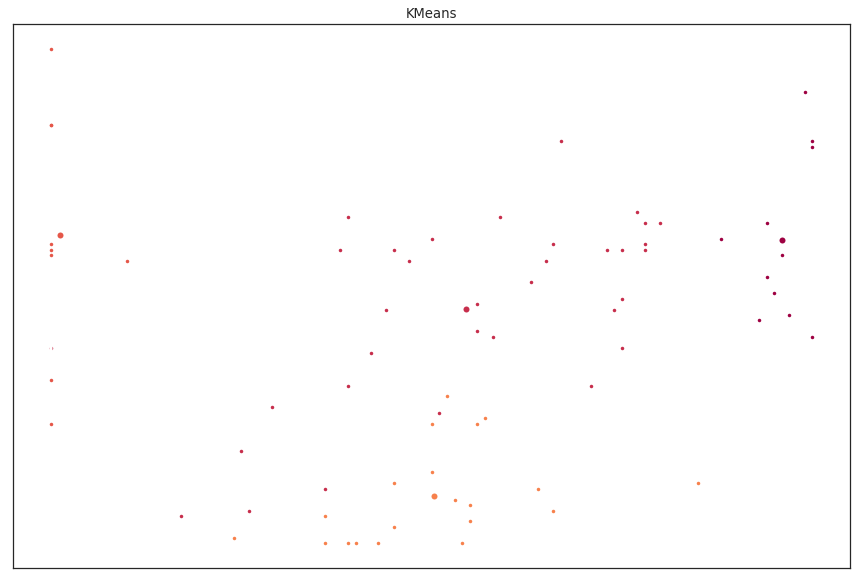

In [174]:
# initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(15, 10))

# colors uses a color map, which will produce an array of colors based on
# the number of labels. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# create a plot
ax = fig.add_subplot(1, 1, 1)

# loop through the data and plot the datapoints and centroids.
# k will range from 0-3, which will match the number of clusters in the dataset.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # create a list of all datapoints, where the datapoitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # plot the datapoints with color col.
    ax.plot(x[my_members, 0], x[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # plot the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# title of the plot
ax.set_title('KMeans')

# remove x-axis ticks
ax.set_xticks(())

# remove y-axis ticks
ax.set_yticks(())

# show the plot
plt.show()

## Hierarchical Clustering 

In [175]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 

In [176]:
featureset_names

,0
0,New South Wales
1,Victoria
2,Queensland
3,South Australia
4,Western Australia
5,Tasmania
6,Northern Territory
7,Canberra Capital Region
8,Burgenland
9,Lower Austria


In [177]:
featureset = df_oecd[['Education', 'Jobs', 'Income', 'Safety',
       'Health', 'Environment', 'Civic engagement', 'Accessiblity to services',
       'Housing', 'Community', 'Life satisfaction']]
featureset_names=pd.DataFrame(df_oecd.index.tolist())
featureset_names.head
Z_merged

,0,1,2,3
Region,,,,
New South Wales,66.0,68.0,0.721110,2.0
Victoria,69.0,399.0,0.836660,3.0
Queensland,79.0,80.0,0.989949,2.0
South Australia,337.0,345.0,1.024695,2.0
Western Australia,221.0,222.0,1.029563,2.0
Tasmania,84.0,85.0,1.048809,2.0
Northern Territory,302.0,303.0,1.048809,2.0
Canberra Capital Region,143.0,145.0,1.067708,2.0
Burgenland,93.0,94.0,1.113553,2.0


In [178]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[ 0.81,  0.84,  0.69,  0.95,  0.85,  0.92,  1.  ,  0.79,  0.78,
         0.89,  0.78],
       [ 0.82,  0.83,  0.58,  0.93,  0.89,  0.96,  1.  ,  0.81,  0.94,
         0.93,  0.85],
       [ 0.76,  0.79,  0.58,  0.95,  0.83,  0.93,  1.  ,  0.81,  0.78,
         0.86,  0.81],
       [ 0.73,  0.76,  0.57,  0.91,  0.84,  0.98,  1.  ,  0.74,  0.78,
         0.86,  0.85],
       [ 0.77,  0.85,  0.67,  0.9 ,  0.89,  0.82,  1.  ,  0.84,  0.94,
         0.85,  0.78]])

In [179]:
#clustering using sklearn 
dist_matrix = distance_matrix(feature_mtx,feature_mtx) 
print(dist_matrix)

[[ 0.          0.22        0.14071247 ...,  1.03638796  0.66828138
   0.77239886]
 [ 0.22        0.          0.20542639 ...,  1.0701869   0.71288148
   0.79422919]
 [ 0.14071247  0.20542639  0.         ...,  1.037256    0.73498299
   0.82752643]
 ..., 
 [ 1.03638796  1.0701869   1.037256   ...,  0.          0.6967783
   0.72256488]
 [ 0.66828138  0.71288148  0.73498299 ...,  0.6967783   0.          0.4237924 ]
 [ 0.77239886  0.79422919  0.82752643 ...,  0.72256488  0.4237924   0.        ]]


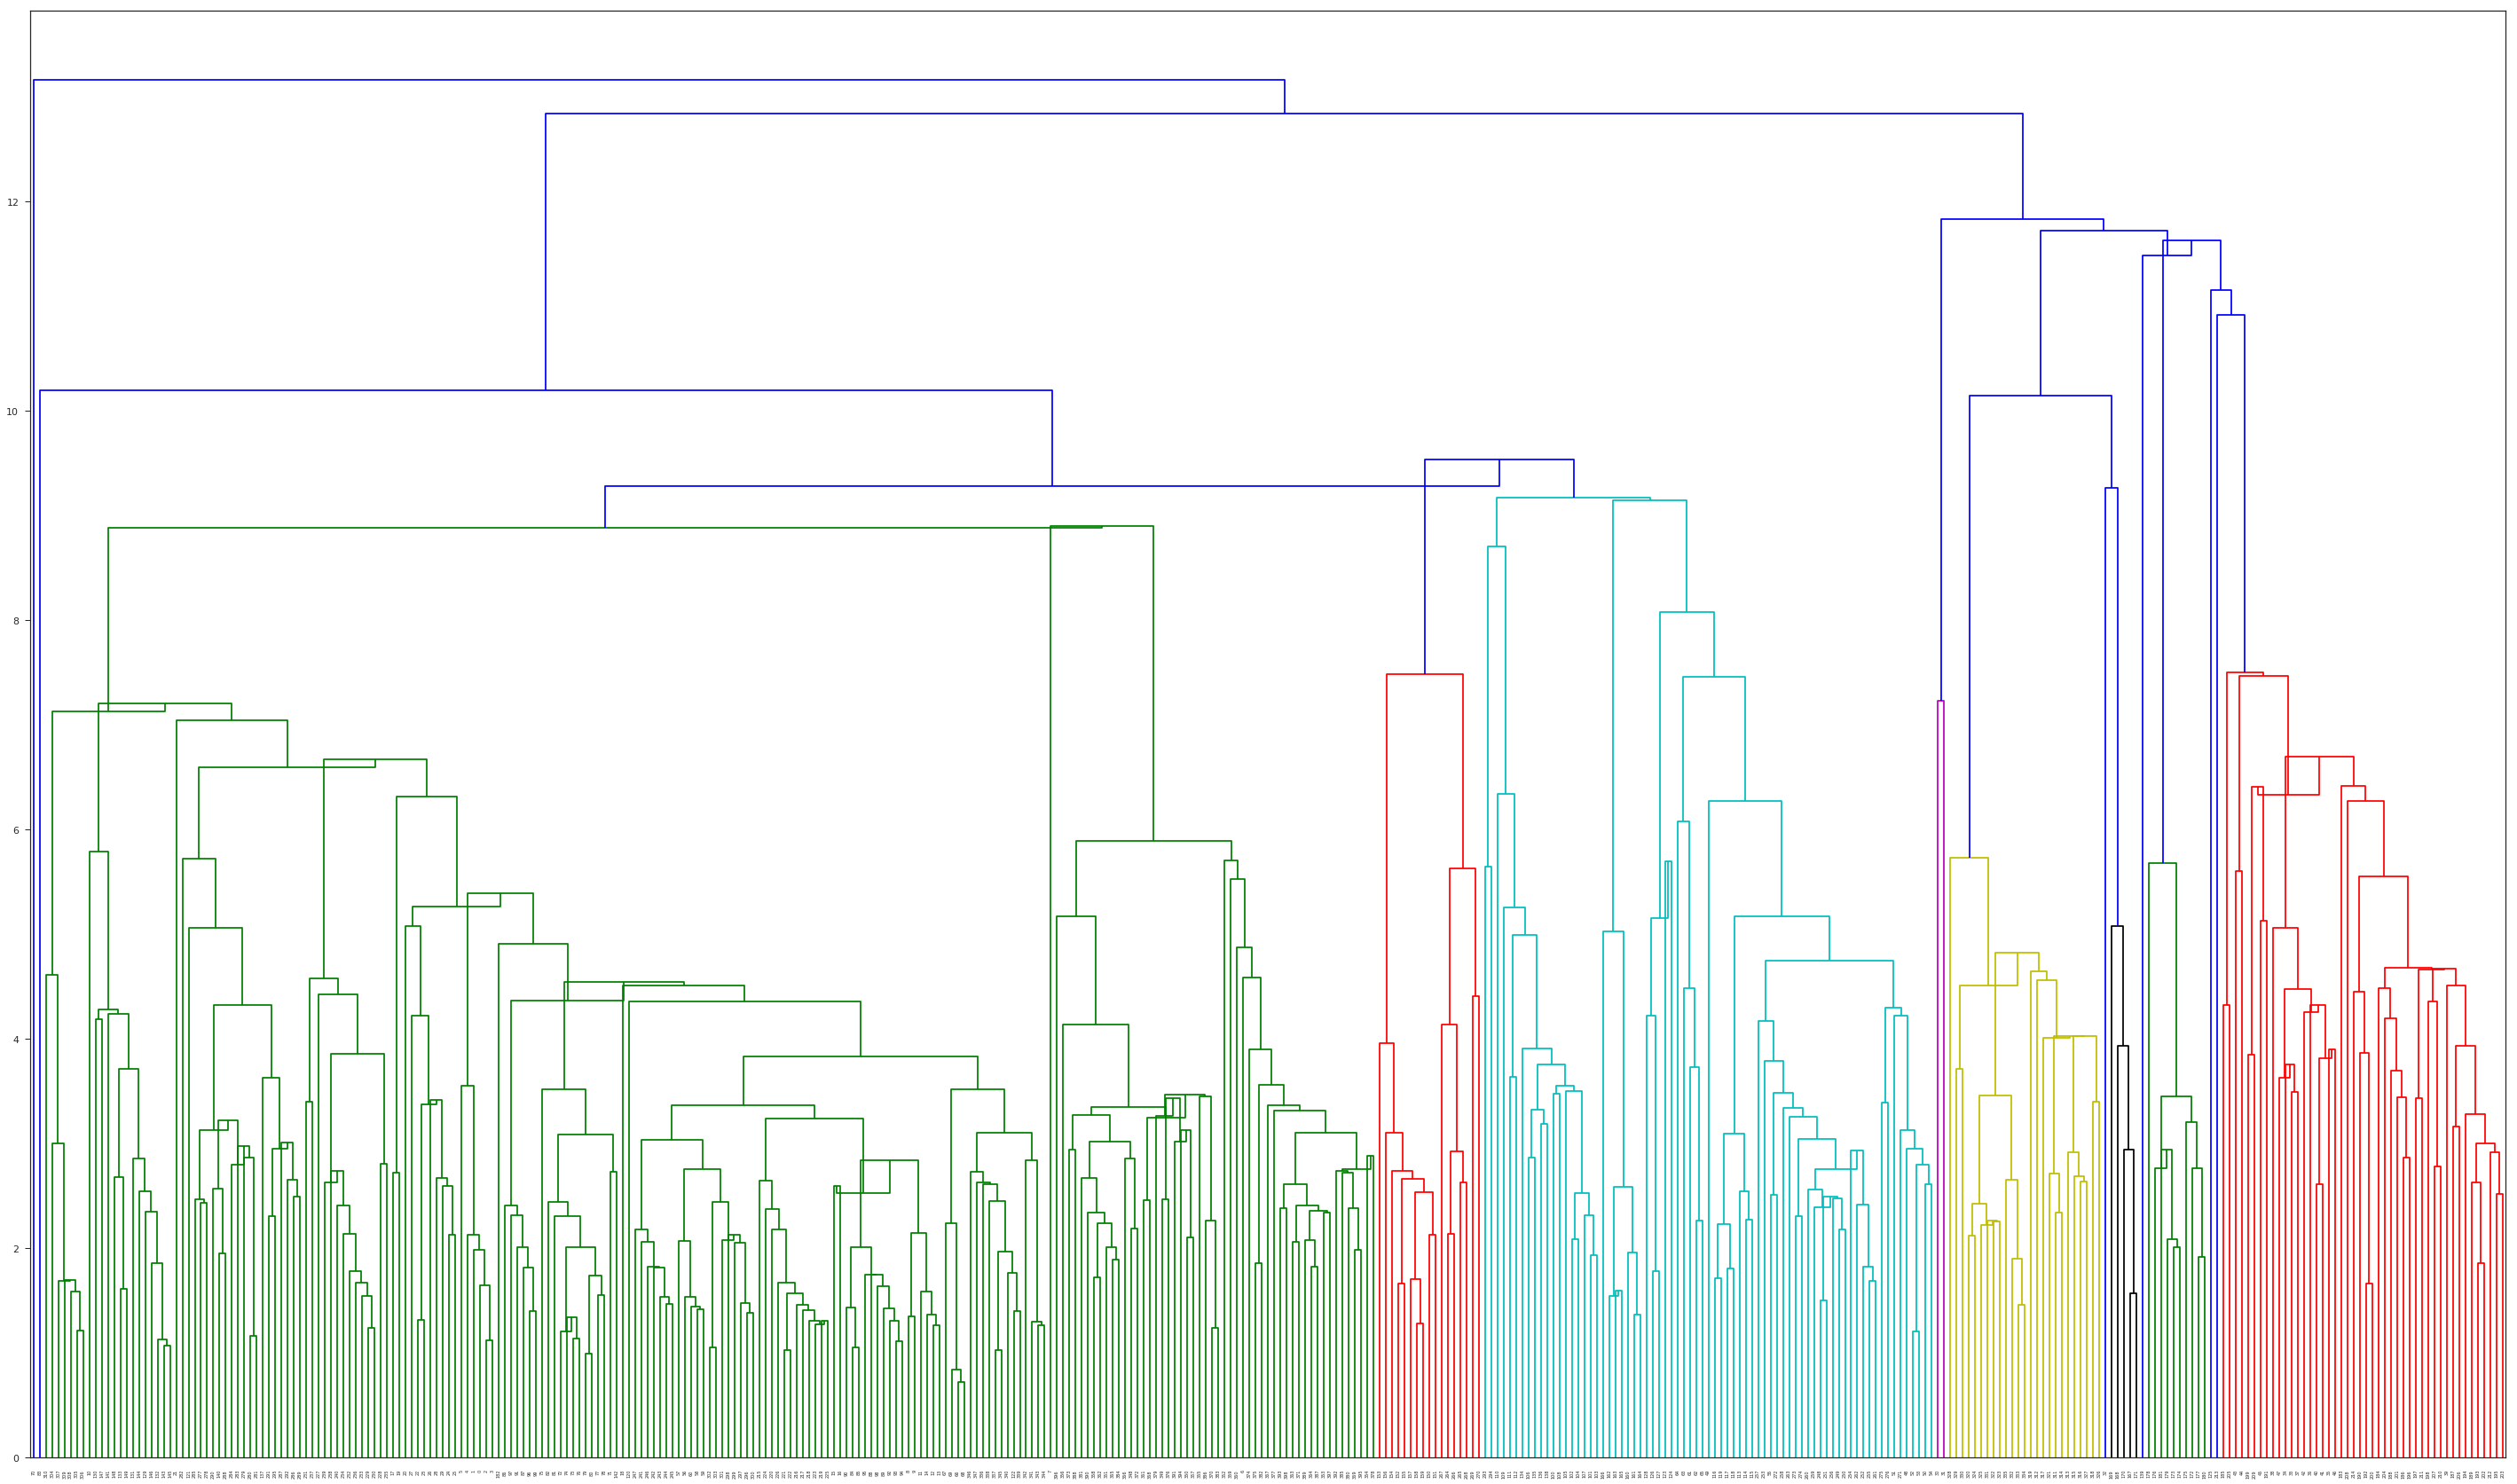

In [180]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(x, 'centroid')
#Z_merged=pd.DataFrame(Z)
#Z_merged[['Region']]=featureset_names
#Z_merged.set_index('Region', inplace=True)
#dendrogram(Z) 
plt.figure(figsize=(50,30))
dn = hierarchy.dendrogram(Z)
#Z_merged.head()

In [181]:
agglom = AgglomerativeClustering(n_clusters = 30, linkage = 'complete')
agglom.fit(feature_mtx)
agglom.labels_

array([ 0,  0,  0,  0,  0,  0,  3,  3,  1,  1, 10,  1,  1,  1,  1,  1,  1,
        4,  1,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 17, 17, 23, 12,
       12, 12, 12, 12,  9,  9,  9,  9, 12, 24, 24, 21, 12, 12, 14, 14, 14,
       14, 14, 14, 14, 14,  0,  0,  0,  0,  0,  8,  8,  8,  8,  8,  1,  1,
        1,  1, 27,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  6,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,  7,  7,  7,  7,  7,  7,
        7,  0,  0,  1, 10, 10, 28, 10, 10, 10,  4,  4,  4,  4,  4,  4, 19,
       19,  6, 19, 22,  6,  4,  4,  4,  4,  4,  4,  4,  4,  4, 25, 25, 25,
       25, 25, 25, 25, 25, 25, 25, 20, 20, 20, 20, 20, 20, 20, 11, 11, 11,
       11, 11, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,  4,  9,  9,  5,  5,
        9,  5,  9,  5, 21,  5,  9,  9,  9,  5,  9,  9, 21,  5,  5,  9,  9,
        5,  5,  9,  9,  9, 21,  9,  9,  9, 26,  5,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [182]:
df_oecd['cluster_hierarch_complete_'] = agglom.labels_
df_oecd.head()

,Country,Code,Education,Jobs,Income,Safety,Health,Environment,Civic engagement,Accessiblity to services,Housing,Community,Life satisfaction,Latitude,Longitude,cluster_hierarch_complete_
Region,,,,,,,,,,,,,,,,
New South Wales,Australia,AU1,8.1,8.4,6.9,9.5,8.5,9.2,10.0,7.9,7.8,8.9,7.8,-31.876,147.287,0
Victoria,Australia,AU2,8.2,8.3,5.8,9.3,8.9,9.6,10.0,8.1,9.4,9.3,8.5,-36.5986,144.678,0
Queensland,Australia,AU3,7.6,7.9,5.8,9.5,8.3,9.3,10.0,8.1,7.8,8.6,8.1,-21.9183,144.459,0
South Australia,Australia,AU4,7.3,7.6,5.7,9.1,8.4,9.8,10.0,7.4,7.8,8.6,8.5,-30.5344,135.63,0
Western Australia,Australia,AU5,7.7,8.5,6.7,9.0,8.9,8.2,10.0,8.4,9.4,8.5,7.8,-25.2303,121.019,0


In [183]:
df_oecd.cluster_hierarch_complete_.unique()

array([ 0,  3,  1, 10,  4, 17, 23, 12,  9, 24, 21, 14,  8, 27,  6, 19,  7,
       28, 22, 25, 20, 11, 15,  5, 26, 13, 18, 29,  2, 16])

In [184]:
df_oecd.loc[df_oecd['cluster_hierarch_complete_'] == 0].describe()

,Education,Jobs,Income,Safety,Health,Environment,Civic engagement,Accessiblity to services,Housing,Community,Life satisfaction,cluster_hierarch_complete_
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.00000,42.0
mean,7.661905,8.192857,4.821429,9.142857,7.554762,8.754762,7.769048,8.450000,6.861905,8.647619,8.70000,0.0
std,1.253863,1.146659,0.873606,1.011192,0.959472,1.038574,1.801014,0.974867,1.873688,1.053505,0.69528,0.0
min,3.800000,3.600000,3.300000,4.700000,5.100000,6.300000,3.700000,6.000000,3.900000,4.300000,7.40000,0.0
25%,7.125000,8.000000,4.325000,8.900000,6.925000,8.200000,6.725000,7.625000,5.000000,8.125000,8.10000,0.0
50%,7.950000,8.350000,4.650000,9.400000,7.700000,9.000000,8.300000,8.600000,6.700000,8.650000,8.50000,0.0
75%,8.550000,8.950000,5.375000,9.800000,8.375000,9.600000,9.075000,9.175000,8.300000,9.375000,9.30000,0.0
max,9.400000,9.600000,6.900000,10.000000,8.900000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,0.0


In [185]:
df_oecd.loc[df_oecd['cluster_hierarch_complete_'] == 0]

,Country,Code,Education,Jobs,Income,Safety,Health,Environment,Civic engagement,Accessiblity to services,Housing,Community,Life satisfaction,Latitude,Longitude,cluster_hierarch_complete_
Region,,,,,,,,,,,,,,,,
New South Wales,Australia,AU1,8.1,8.4,6.9,9.5,8.5,9.2,10.0,7.9,7.8,8.9,7.8,-31.876,147.287,0
Victoria,Australia,AU2,8.2,8.3,5.8,9.3,8.9,9.6,10.0,8.1,9.4,9.3,8.5,-36.5986,144.678,0
Queensland,Australia,AU3,7.6,7.9,5.8,9.5,8.3,9.3,10.0,8.1,7.8,8.6,8.1,-21.9183,144.459,0
South Australia,Australia,AU4,7.3,7.6,5.7,9.1,8.4,9.8,10.0,7.4,7.8,8.6,8.5,-30.5344,135.63,0
Western Australia,Australia,AU5,7.7,8.5,6.7,9.0,8.9,8.2,10.0,8.4,9.4,8.5,7.8,-25.2303,121.019,0
Tasmania,Australia,AU6,6.2,7.3,5.3,8.6,6.6,10.0,10.0,7.3,9.4,8.6,9.6,-42.1422,146.672,0
Newfoundland and Labrador,Canada,CA10,8.7,4.5,5.2,8.9,5.1,10.0,3.7,7.9,10.0,7.9,10.0,53.8217,-61.2296,0
Prince Edward Island,Canada,CA11,8.6,6.8,4.4,10.0,6.9,10.0,7.8,7.6,9.4,4.3,10.0,46.3356,-63.1467,0
Nova Scotia,Canada,CA12,9.0,7.0,4.4,8.8,6.0,10.0,5.9,7.7,10.0,8.1,8.5,45.196,-63.1654,0


In [186]:
df_oecd.loc[df_oecd['cluster_hierarch_complete_'] == 1].describe()

,Education,Jobs,Income,Safety,Health,Environment,Civic engagement,Accessiblity to services,Housing,Community,Life satisfaction,cluster_hierarch_complete_
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.0
mean,8.067213,8.632787,4.709836,9.500000,7.309836,5.855738,6.144262,9.013115,5.650820,8.904918,7.475410,1.0
std,0.820512,0.827793,0.759101,0.523132,1.178517,1.489801,2.191995,0.697251,0.933742,0.634409,1.559237,0.0
min,6.400000,6.200000,3.600000,6.800000,4.900000,2.100000,1.100000,7.400000,3.300000,7.100000,3.700000,1.0
25%,7.600000,8.200000,4.000000,9.100000,6.700000,5.000000,4.900000,8.600000,5.000000,8.500000,6.700000,1.0
50%,8.200000,8.700000,4.600000,9.600000,7.200000,5.500000,6.900000,8.900000,5.600000,8.900000,7.400000,1.0
75%,8.600000,9.200000,5.300000,9.900000,7.800000,6.500000,7.800000,9.700000,6.100000,9.300000,8.900000,1.0
max,9.900000,10.000000,6.200000,10.000000,10.000000,9.000000,10.000000,10.000000,7.800000,10.000000,10.000000,1.0


In [187]:
df_oecd.loc[df_oecd['cluster_hierarch_complete_'] == 1]

,Country,Code,Education,Jobs,Income,Safety,Health,Environment,Civic engagement,Accessiblity to services,Housing,Community,Life satisfaction,Latitude,Longitude,cluster_hierarch_complete_
Region,,,,,,,,,,,,,,,,
Burgenland,Austria,AT11,8.7,7.9,5.3,10.0,7.1,3.3,8.8,7.9,6.1,8.3,7.8,47.5,16.4167,1
Lower Austria,Austria,AT12,8.4,8.6,5.6,9.9,7.0,3.5,8.8,8.6,5.6,7.8,8.1,48.2818,15.7632,1
Carinthia,Austria,AT21,9.0,8.0,5.2,10.0,7.5,5.2,7.5,7.9,5.6,8.5,8.1,46.75,13.8333,1
Styria,Austria,AT22,8.5,8.3,5.2,10.0,7.7,4.6,7.8,8.7,5.0,8.7,8.5,47.25,15.1667,1
Upper Austria,Austria,AT31,8.1,9.0,5.4,9.9,8.0,4.2,8.2,8.4,5.6,8.9,8.5,48.25,14,1
Salzburg,Austria,AT32,8.6,9.2,5.5,10.0,8.4,5.3,8.0,8.4,5.0,8.6,8.1,47.7981,13.0465,1
Tyrol,Austria,AT33,8.2,9.0,5.3,10.0,8.6,6.5,7.1,8.6,4.4,9.7,8.9,47.2232,11.5261,1
Vorarlberg,Austria,AT34,7.8,9.2,5.7,10.0,8.6,6.0,6.2,8.2,5.0,8.1,7.4,47.25,9.91667,1
Flemish Region (Vlaams Gewest),Belgium,BE2,8.2,7.7,4.6,9.3,8.5,4.8,10.0,8.1,7.8,9.1,7.8,51.0962,4.17985,1


In [188]:
df_oecd.loc[df_oecd.index == 'Valparaíso']

,Country,Code,Education,Jobs,Income,Safety,Health,Environment,Civic engagement,Accessiblity to services,Housing,Community,Life satisfaction,Latitude,Longitude,cluster_hierarch_complete_
Region,,,,,,,,,,,,,,,,
Valparaíso,Chile,CL05,5.9,5.9,0.8,0.0,5.2,5.3,1.1,3.1,2.2,6.3,7.4,-33.0458,-71.6197,12


In [189]:
df_oecd.loc[df_oecd['cluster_hierarch_complete_'] == 12]

,Country,Code,Education,Jobs,Income,Safety,Health,Environment,Civic engagement,Accessiblity to services,Housing,Community,Life satisfaction,Latitude,Longitude,cluster_hierarch_complete_
Region,,,,,,,,,,,,,,,,
Tarapacá,Chile,CL01,5.9,7.1,0.9,0.0,5.3,5.8,0.0,3.2,1.1,4.1,5.6,-20.1637,-69.5463,12
Antofagasta,Chile,CL02,6.5,5.7,1.3,0.0,3.7,6.5,0.0,5.9,1.1,6.3,7.0,-23.6464,-70.398,12
Atacama,Chile,CL03,5.2,5.0,0.8,0.0,5.4,8.3,0.3,3.3,1.7,6.6,1.9,-24.5563,-69.4226,12
Coquimbo,Chile,CL04,4.8,6.0,0.5,1.9,6.7,8.3,0.6,1.9,1.7,7.4,6.3,-29.9532,-71.338,12
Valparaíso,Chile,CL05,5.9,5.9,0.8,0.0,5.2,5.3,1.1,3.1,2.2,6.3,7.4,-33.0458,-71.6197,12
Los Lagos,Chile,CL10,3.3,8.4,0.7,2.5,4.2,9.7,0.3,1.6,2.2,6.1,5.6,-42.3008,-73.1054,12
Los Rios,Chile,CL14,4.4,6.9,0.5,0.0,4.4,9.2,0.9,1.0,0.0,6.4,2.6,-1.49413,-79.5542,12
Arica y Parinacota,Chile,CL15,6.2,4.1,0.4,0.4,5.5,5.5,0.0,3.5,0.0,6.7,4.8,-18.5919,-69.7586,12


## Density Clustering

In [190]:
from sklearn.cluster import DBSCAN
#import sklearn.utils
#from sklearn.preprocessing import StandardScaler

dbscan = DBSCAN(eps=9.7, min_samples=2, algorithm='auto', metric='minkowski', leaf_size=90, p=2)
dbscan

DBSCAN(algorithm='auto', eps=9.7, leaf_size=90, metric='minkowski',
    metric_params=None, min_samples=2, n_jobs=1, p=2)

In [191]:

x_dbscan=StandardScaler().fit_transform(df_oecd[['Education', 'Jobs', 'Income', 'Safety',
       'Health', 'Environment', 'Civic engagement', 'Accessiblity to services',
       'Housing', 'Community', 'Life satisfaction']])

dbscan.fit(x_dbscan)
set(dbscan.labels_)
#x_dbscan

{0}

In [193]:
#import matplotlib.pyplot as plt
#import seaborn as sns

# Set style of scatterplot
#sns.set_context("notebook", font_scale=1.1)
#sns.set_style("ticks")

# Create scatterplot of dataframe
#sns.lmplot('x_dbscan.index', # Horizontal axis
#           'x_dbscan', # Vertical axis
#           data=x_dbscan,
#           fit_reg=False)


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(x_dbscan)
pca_2d = pca.transform(x_dbscan)
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',
    marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g',
    marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',
    marker='*')
plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2',
'Noise'])
plt.title('DBSCAN finds 2 clusters and noise')
plt.show()

## Get data from Foursquare

In [282]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda/envs/DSX-Python35:
#
geopy                     1.18.1                     py_0    conda-forge
Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda/envs/DSX-Python35:
#
folium                    0.5.0                      py_0    conda-forge
Libraries imported.


In [320]:
#df_oecd1.reset_index(drop=True)
df_oecd1.head()

,Country,Code,Education,Jobs,Income,Safety,Health,Environment,Civic engagement,Accessiblity to services,Housing,Community,Life satisfaction,Latitude,Longitude
0,Australia,AU1,8.1,8.4,6.9,9.5,8.5,9.2,10.0,7.9,7.8,8.9,7.8,-31.876,147.287
1,Australia,AU2,8.2,8.3,5.8,9.3,8.9,9.6,10.0,8.1,9.4,9.3,8.5,-36.5986,144.678
2,Australia,AU3,7.6,7.9,5.8,9.5,8.3,9.3,10.0,8.1,7.8,8.6,8.1,-21.9183,144.459
3,Australia,AU4,7.3,7.6,5.7,9.1,8.4,9.8,10.0,7.4,7.8,8.6,8.5,-30.5344,135.63
4,Australia,AU5,7.7,8.5,6.7,9.0,8.9,8.2,10.0,8.4,9.4,8.5,7.8,-25.2303,121.019


In [327]:
# create map of world
map_world = folium.Map()
#df_oecd1=df_oecd.copy()
#df_oecd1.reset_index(inplace=True)
# add markers to map
for lat, lng, region in zip(df_oecd['Latitude'], df_oecd['Longitude'],df_oecd.index):
    label = '{}'.format(region)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_world) 
    
map_world

In [328]:
# The code was removed by Watson Studio for sharing.

Your credentails:
CLIENT_ID: 0ONCEUND11DYFXHF4LW1GX44W4QZKFW1AU2WQMO2P5HVYTMO
CLIENT_SECRET:SPRNAOPCR0BBYZY3UYUGCOKWLUCPB3KKL3JN4P2VC0FKDE5N


In [329]:
#search_query = neighborhood_name
radius = 500
LIMIT = 100
#url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, neighborhood_latitude, neighborhood_longitude, VERSION, radius, LIMIT)
#results = requests.get(url).json()
#results



In [ ]:
#results = requests.get(url).json()
#results

In [285]:
#remove Regions without coordinates

#df_oecd.head()

In [286]:
#df_oecd.loc[df_oecd['Latitude'] == 0]

In [330]:
# function that extracts the category of the venue
import requests
LIMIT=100
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#Function to get near venues

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [331]:
df_oecd.index

Index(['New South Wales', 'Victoria', 'Queensland', 'South Australia',
       'Western Australia', 'Tasmania', 'Northern Territory',
       'Canberra Capital Region', 'Burgenland', 'Lower Austria',
       ...
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='Region', length=396)

In [369]:
address = 'Valparaíso, Chile'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
lat=latitude
long=longitude
print(latitude, longitude)

-33.0458456 -71.6196749


In [359]:
search_query = 'Italian'
radius = 500
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=0ONCEUND11DYFXHF4LW1GX44W4QZKFW1AU2WQMO2P5HVYTMO&client_secret=SPRNAOPCR0BBYZY3UYUGCOKWLUCPB3KKL3JN4P2VC0FKDE5N&ll=40.7149555,-74.0153365&v=20180605&query=Italian&radius=500&limit=100'

In [367]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        if len(categories_list) == 0:
            return None
        else:
            return categories_list[0]['name']
venues_merged=pd.DataFrame()
radius = 100000
LIMIT=100
for lat, long, region in zip(df_oecd['Latitude'], df_oecd['Longitude'], df_oecd.index):
#    print(region, lat, long)
     # create the API request URL
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&intent=global'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    results = requests.get(url).json()
    try:
        venues = results['response']['venues']
        # tranform venues into a dataframe
        dataframe = json_normalize(venues)
        #dataframe.head()

        # keep only columns that include venue name, and anything that is associated with location
        filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
        dataframe_filtered = dataframe.loc[:, filtered_columns]

        # filter the category for each row
        dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

        # clean column names by keeping only last term
        dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
        venues_merged=venues.append(dataframe_filtered.columns)
        print(venues_merged.shape)
    except: print('no data')


no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [370]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)

In [368]:
venues_merged

""


In [371]:
results

{'meta': {'code': 403,
  'errorDetail': 'Quota exceeded',
  'errorType': 'rate_limit_exceeded',
  'requestId': '5c648592dd57977f474513d6'},
 'response': {}}

In [356]:
#for lat, long, region in zip(df_oecd['Latitude'], df_oecd['Longitude'], df_oecd.idex)
results = requests.get(url).json()
venues = results['response']['venues']
    # tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

'''    # keep only columns that include venue name, and anything that is associated with location
    filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
    dataframe_filtered = dataframe.loc[:, filtered_columns]

    # function that extracts the category of the venue
    def get_category_type(row):
        try:
            categories_list = row['categories']
        except:
            categories_list = row['venue.categories']

        if len(categories_list) == 0:
            return None
        else:
            return categories_list[0]['name']

    # filter the category for each row
    dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

    # clean column names by keeping only last term
    dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

    dataframe_filtered'''

KeyError: 'venues'

In [339]:
dataframe_filtered.name

0          Harry's Italian Pizza Bar
1    Conca Cucina Italian Restaurant
2                               Ecco
Name: name, dtype: object

In [296]:
region_venues = getNearbyVenues(names=df_oecd.index,
                                   latitudes=df_oecd['Latitude'],
                                   longitudes=df_oecd['Longitude']
                                  )

New South Wales
Victoria
Queensland
South Australia
Western Australia
Tasmania
Northern Territory
Canberra Capital Region
Burgenland
Lower Austria
Vienna
Carinthia
Styria
Upper Austria
Salzburg
Tyrol
Vorarlberg
Brussels-Capital Region
Flemish Region (Vlaams Gewest)
Wallonia (Région wallonne)
Newfoundland and Labrador
Prince Edward Island
Nova Scotia
New Brunswick
Quebec
Ontario
Manitoba
Saskatchewan
Alberta
British Columbia
Yukon
Northwest Territories
Nunavut
Tarapacá
Antofagasta
Atacama
Coquimbo
Valparaíso
O'Higgins
Maule
Bío-Bío
Araucanía
Los Lagos
Aysén
Magallanes y Antártica
Santiago Metropolitan
Los Rios
Arica y Parinacota
Prague
Central Bohemian Region
Southwest
Northwest
Northeast
Southeast
Central Moravia
Moravia-Silesia
Copenhagen Region
Zealand
Southern Denmark
Central Jutland
Northern Jutland
North Estonia
West Estonia
Central Estonia
Northeast Estonia
South Estonia
Western Finland
Helsinki-Uusimaa
Southern Finland
Eastern and Northern Finland
Åland
Île-de-France
Centre - Va

KeyError: 'groups'

In [297]:
region_venues.head()

NameError: name 'region_venues' is not defined

In [292]:
venues = results['response']['venues'][0]
venues
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

NameError: name 'results' is not defined